In [1]:
import pathlib
import os

import pandas as pd

import matplotlib.pyplot as plt
import datetime
%matplotlib inline

import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import mapclassify

In [2]:
import pymysql

In [3]:
db = pymysql.connect(host='localhost',
                     user='root',
                     password='password',
                     database='chicago')
cursor = db.cursor()

In [5]:
sqlcom ="SELECT * FROM weekday_morningPeak"
df= pd.read_sql(sqlcom, con=db)
print(df)

/opt/anaconda3/envs/python/lib/python3.9/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


             node_id         lat         lon            timestamp value_hrf
0       001e0611441e   41.808594  -87.665048  2019/09/30 04:00:00     56.72
1       001e0610bc10   41.736314  -87.624179  2019/09/30 04:00:02     85.02
2       001e061146cb  41.9140942  -87.683022  2019/09/30 04:00:02     62.74
3       001e0610ba13   41.751238   -87.71299  2019/09/30 04:00:04     56.72
4       001e06113acb   41.839066  -87.665685  2019/09/30 04:00:04     56.72
...              ...         ...         ...                  ...       ...
106851  001e0610ba13   41.751238   -87.71299  2019/10/04 08:59:57     56.72
106852  001e061130f4   41.896157  -87.662391  2019/10/04 08:59:57     56.72
106853  001e061183f5   41.692703   -87.62102  2019/10/04 08:59:57     62.74
106854  001e06113ace    41.83107  -87.617298  2019/10/04 08:59:58     56.72
106855  001e0610bbe5   41.736495  -87.614529  2019/10/04 08:59:59     56.72

[106856 rows x 5 columns]


In [7]:
from decimal import Decimal
dict={}
for i in range(0,len(df)):
    key=df.iloc[i]['node_id']
    lat=df.iloc[i]['lat']
    lon=df.iloc[i]['lon']
    value=float(df.iloc[i]['value_hrf'])
    
    if key in dict:
        tempDict=dict.get(key)
        valueTemp=tempDict["value"]
        valueTemp.append(value)
        dict[key]=tempDict 
    else:
        dict[key]={"value":[value],"lon":lon,"lat":lat}

temp={}
for key in dict:
    tempDict=dict.get(key)
#     tempDict['average']=Decimal(np.mean(tempDict["value"])).quantize(Decimal('0.00'))
    tempDict['average']=np.mean(tempDict["value"])
    temp[key]=tempDict
print(temp)

{'001e0611441e': {'value': [56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 62.74, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 55.0, 56.72, 55.0, 62.74, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 55.0, 55.0, 55.0, 56.72, 55.0, 55.0, 55.0, 56.72, 55.0, 56.72, 56.72, 56.72, 55.0, 55.0, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 55.0, 56.72, 56.72, 56.72, 56.72, 55.0, 55.0, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 55.0, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 55.0, 56.72, 56.72, 55.0, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 55.0, 55.0, 55.0, 55.0, 56.72, 55.0, 56.72, 55.0, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 55.0, 55.0, 56.72, 56.72, 55.

In [8]:
df=pd.DataFrame.from_dict(temp,orient='index')
df

,value,lon,lat,average
001e0611441e,"[56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56....",-87.665048,41.808594,57.214022
001e0610bc10,"[85.02, 85.35, 85.35, 85.02, 85.67, 85.35, 85....",-87.624179,41.736314,86.774787
001e061146cb,"[62.74, 62.74, 62.74, 66.26, 62.74, 62.74, 62....",-87.683022,41.9140942,59.368924
001e0610ba13,"[56.72, 56.72, 55.0, 55.0, 55.0, 55.0, 55.0, 5...",-87.71299,41.751238,56.649477
001e06113acb,"[56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56....",-87.665685,41.839066,58.589022
001e06113d20,"[56.72, 56.72, 56.72, 55.0, 56.72, 55.0, 56.72...",-87.6116431,41.8920031,56.386759
001e061183f5,"[56.72, 62.74, 66.26, 62.74, 62.74, 62.74, 62....",-87.62102,41.692703,61.274622
001e06118509,"[62.74, 62.74, 62.74, 62.74, 62.74, 62.74, 62....",-87.654487,41.779744,64.168571
001e0610bbe5,"[55.0, 55.0, 55.0, 55.0, 56.72, 55.0, 55.0, 55...",-87.614529,41.736495,56.809465
001e0610ee43,"[56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56....",-87.598713,41.788608,58.199909


In [9]:
df.shape

(35, 4)

In [10]:
df['average']

001e0611441e    57.214022
001e0610bc10    86.774787
001e061146cb    59.368924
001e0610ba13    56.649477
001e06113acb    58.589022
001e06113d20    56.386759
001e061183f5    61.274622
001e06118509    64.168571
001e0610bbe5    56.809465
001e0610ee43    58.199909
001e06112e77    56.873571
001e06113107    57.185183
001e061130f4    57.509791
001e0610f703    59.846163
001e0610e538    61.590411
001e061182a7    62.047298
001e0610f05c    62.381616
001e061144be    57.297497
001e0610ba46    60.848065
001e06113ad8    57.484110
001e0610ee5d    58.490183
001e0610f732    61.951959
001e06113ace    56.906405
001e0610ba15    56.395117
001e06113a24    57.291870
001e061146ba    56.849559
001e06118295    60.826457
001e0611536c    57.293537
001e06117b44    62.519623
001e0610ee36    58.670584
001e0610f6db    57.054895
001e0611850f    62.131066
001e061184a3    62.938452
001e061144cd    56.820348
001e0611462f    56.408204
Name: average, dtype: float64

In [11]:
df['lat'].astype(float)

001e0611441e    41.808594
001e0610bc10    41.736314
001e061146cb    41.914094
001e0610ba13    41.751238
001e06113acb    41.839066
001e06113d20    41.892003
001e061183f5    41.692703
001e06118509    41.779744
001e0610bbe5    41.736495
001e0610ee43    41.788608
001e06112e77    41.786756
001e06113107    41.751142
001e061130f4    41.896157
001e0610f703    41.871480
001e0610e538    41.736593
001e061182a7    41.691803
001e0610f05c    41.924903
001e061144be    41.792543
001e0610ba46    41.878377
001e06113ad8    41.866786
001e0610ee5d    41.923996
001e0610f732    41.895005
001e06113ace    41.831070
001e0610ba15    41.722457
001e06113a24    41.788979
001e061146ba    41.967590
001e06118295    41.820972
001e0611536c    41.885750
001e06117b44    41.721301
001e0610ee36    41.751295
001e0610f6db    41.791329
001e0611850f    41.692837
001e061184a3    41.714021
001e061144cd    41.874200
001e0611462f    41.823527
Name: lat, dtype: float64

In [12]:
Chicago_Streets_Shapefiles = '.../street-chicago.shp'
Chicago_Boundary_Shapefile = '.../il-chicago.shp'

Text(0.5, 1.0, 'Sound level at morning peak in Chicago on weekdays')

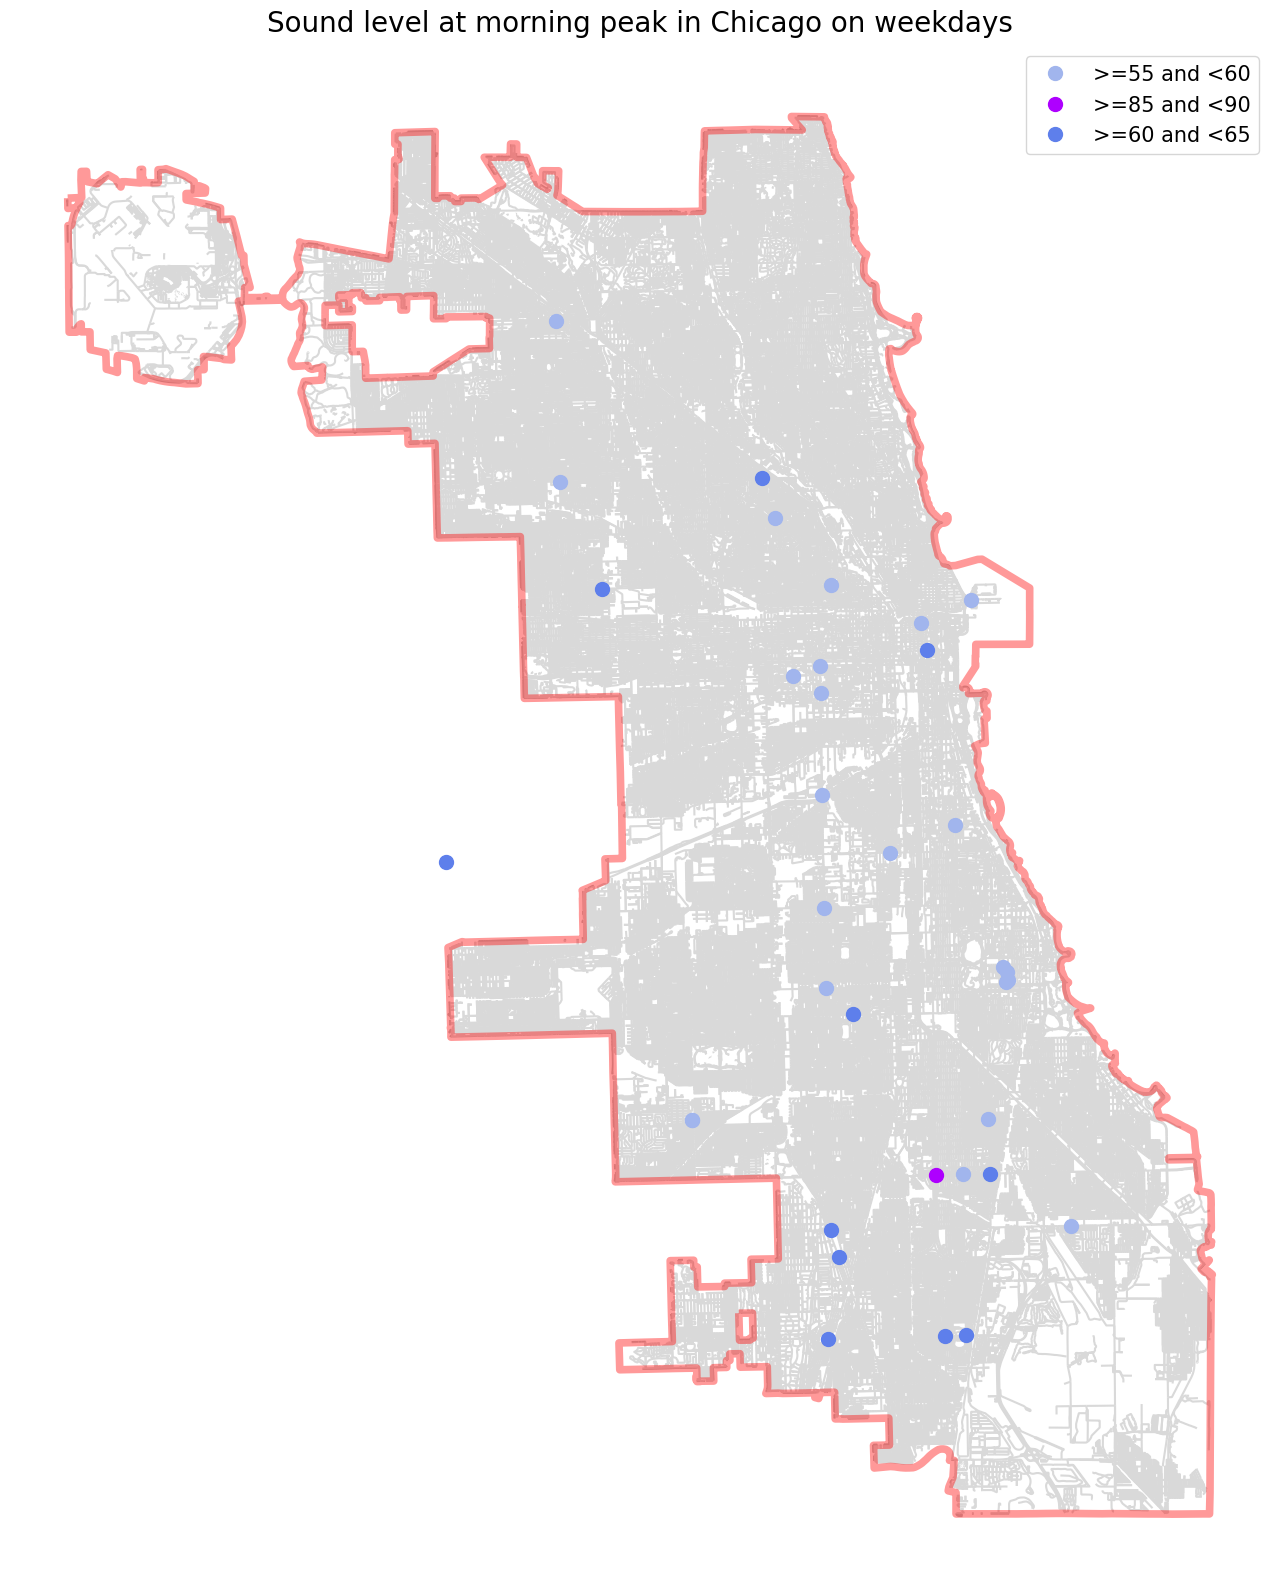

In [16]:
plt.style.use('default')

# Read street information
streetmap = gpd.read_file(Chicago_Streets_Shapefiles)
f, ax = plt.subplots(1, figsize=(20, 20))

# Draw the streets of Chicago
streetmap.plot(ax=ax, color='silver', zorder = 0)

# Read boundary information
boundary = gpd.read_file(Chicago_Boundary_Shapefile)
# Draw the boundaries of Chicago
boundary.plot(ax=ax, color='white', alpha = 0.4, linewidth=5.5, edgecolor='red', zorder = 5)

colorDict={}

for i in range(0, len(df)):
    if df.iloc[i]['average']<50:
        color="#a3a6fa"
        label='<50'
    elif df.iloc[i]['average']>=50 and df.iloc[i]['average']<55:
        color="#FFA0D0"
        label='>=50 and <55'
    elif df.iloc[i]['average']>=55 and df.iloc[i]['average']<60:
        color="#a1b5ed"
        label='>=55 and <60'
    elif df.iloc[i]['average']>=60 and df.iloc[i]['average']<65:
        color="#5e7feb"
        label='>=60 and <65'
    elif df.iloc[i]['average']>=65 and df.iloc[i]['average']<70:
        color="#f4ff75"
        label='>=65 and <70'
    elif df.iloc[i]['average']>=70 and df.iloc[i]['average']<75:
        color = "#ffa43b"
        label='>=70 and <75'
    elif df.iloc[i]['average']>=75 and df.iloc[i]['average']<80:
        color="#B20059"
        label='>=75 and <80'
    elif df.iloc[i]['average']>=80 and df.iloc[i]['average']<85:
        color = "#155c09"
        label='>=80 and <85'
    elif df.iloc[i]['average']>=85 and df.iloc[i]['average']<90:
        color="#ae00ff"
        label='>=85 and <90'
    elif df.iloc[i]['average']>=90 and df.iloc[i]['average']<95:
        color="#db0d0d"
        label='>=90 and <95'
    else:
        print(df.iloc[i]['average'])
        color="#0d89b3"
        label='>=95 and <100' 
    if  color in colorDict:
        label=""
    else:
        colorDict[color]=label

    ax.plot(float(df.iloc[i]['lon']),float(df.iloc[i]['lat']), marker='o', label=label, color=color,linestyle='', ms=10, zorder = 10)
#     print(df.iloc[i]['average'],float(df.iloc[i]['lon']),float(df.iloc[i]['lat']))
    
# ax.legend(),set legend
ax.legend()
plt.legend(loc=1,fontsize = 15)

title='Sound level at morning peak in Chicago on weekdays'

# Turn off the X and Y axes
ax.set_axis_off()
ax.set_title(title, fontsize = 20, fontdict = {'verticalalignment':'bottom'})
